# Parallel Processing in Python

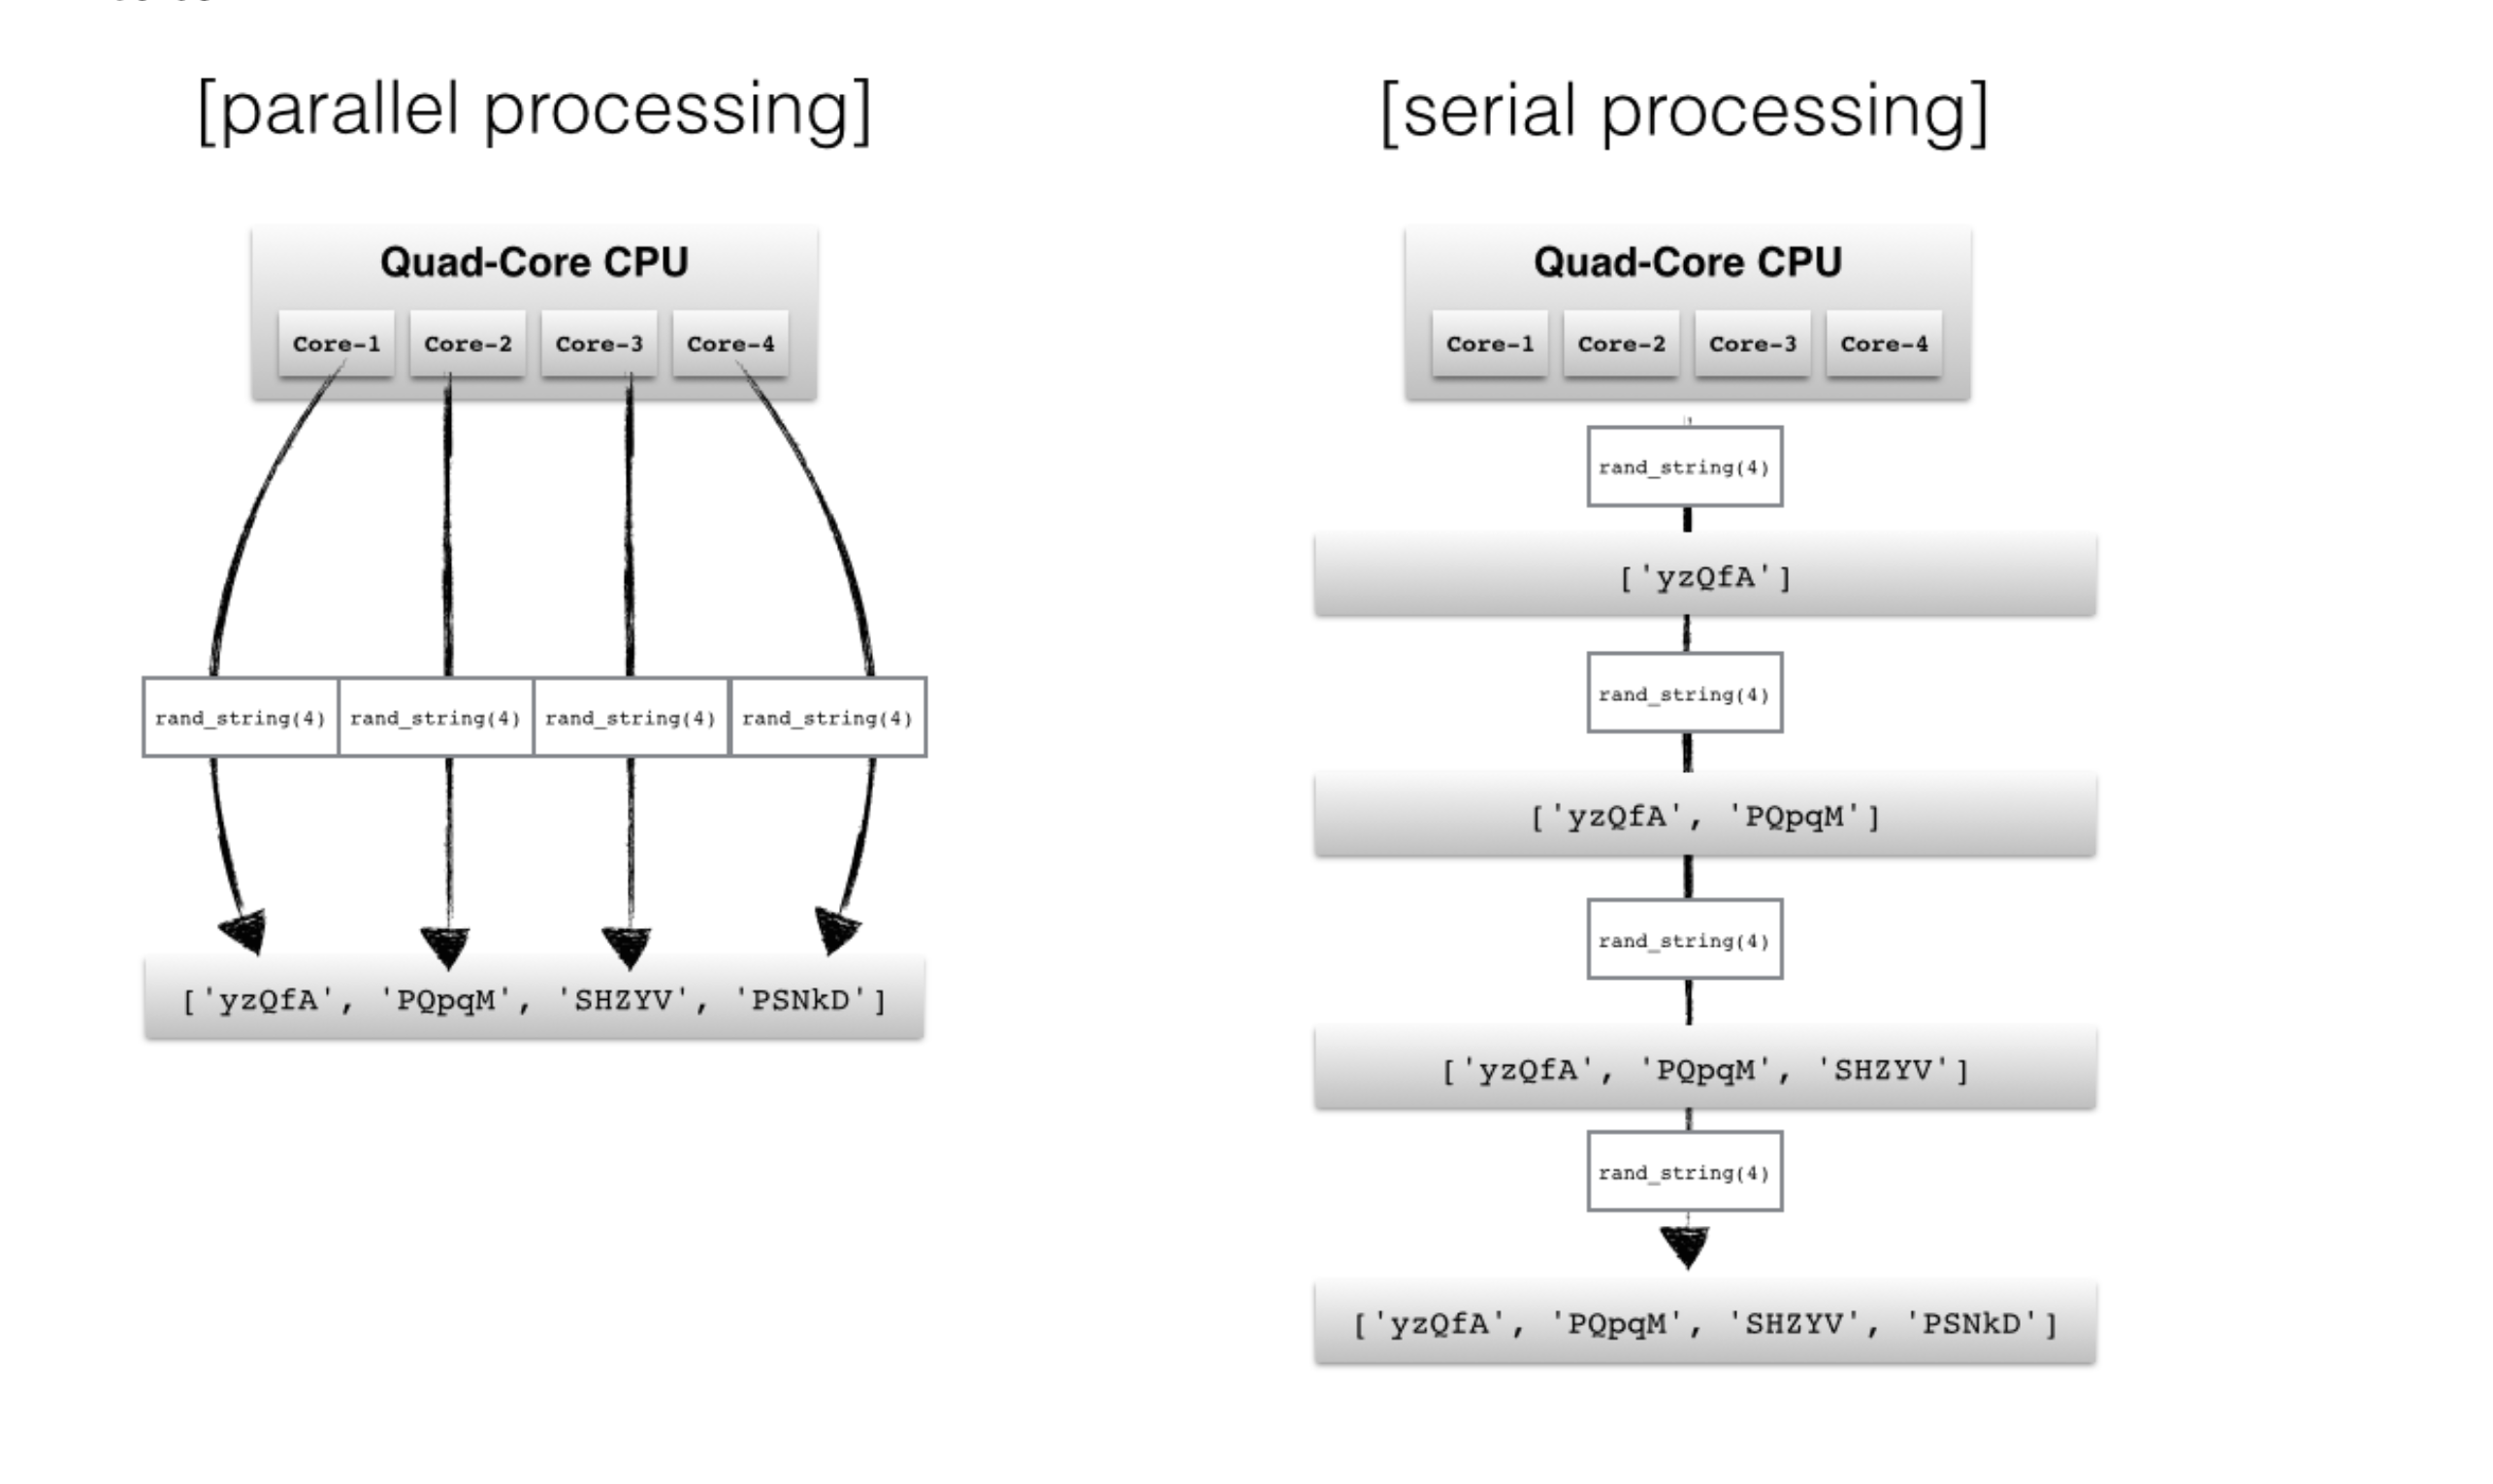

In [13]:
from IPython.display import Image
Image(filename='1.png') 

### Multithreading

<font color=blue> The Python threading module uses threads instead of processes. Threads run in the same unique memory heap. Whereas Processes run in separate memory heaps. </font>

This, makes sharing information harder with processes and object instances. One problem arises because threads use the same memory heap, multiple threads can write to the same location in the memory heap which is why the global interpreter lock(GIL) in CPython was created as a mutex to prevent it from happening.

What’s Multithreading?

The multithreading library is lightweight, shares memory, responsible for responsive UI and is used well for I/O bound applications. However, the module isn’t killable and is subject to the GIL

Multiple threads live in the same process in the same space, each thread will do a specific task, have its own code, own stack memory, instruction pointer, and share heap memory. If a thread has a memory leak it can damage the other threads and parent process.




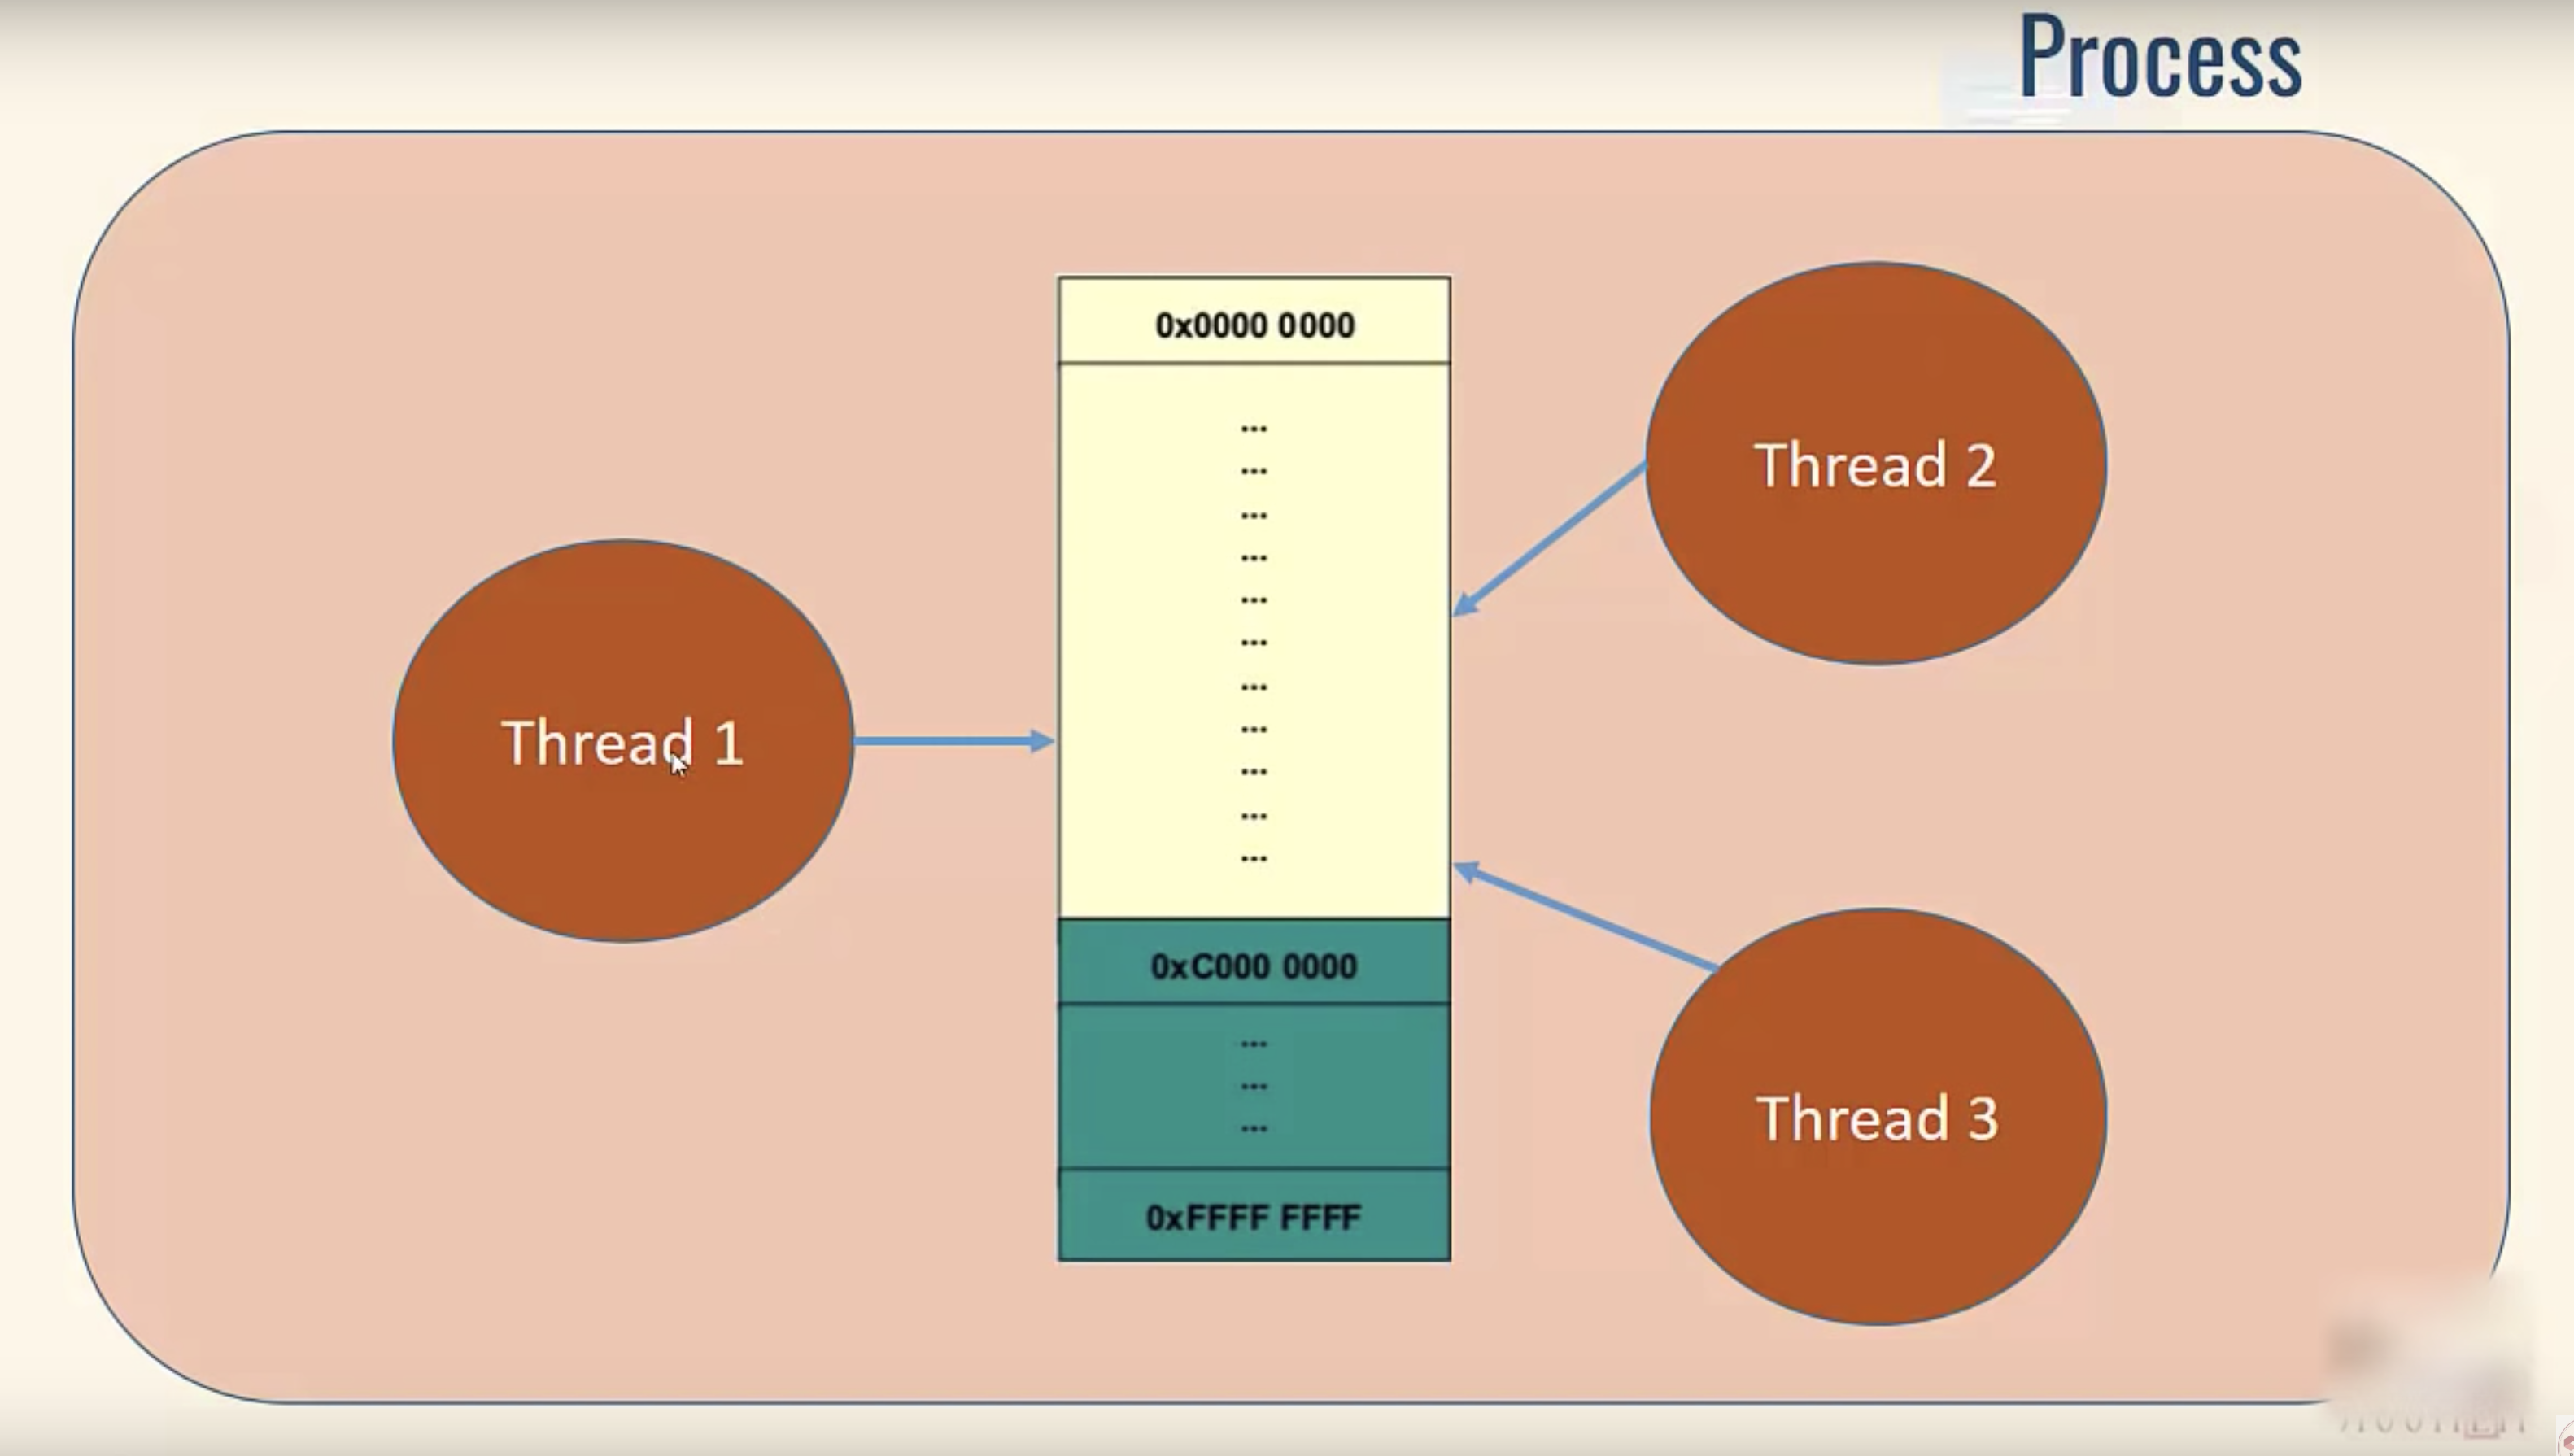

In [15]:
Image(filename='2.png') 

### Multiprocessing

The multiprocessing library uses separate memory space, multiple CPU cores, bypasses GIL limitations in CPython, child processes are killable(ex. function calls in program) and is much easier to use. Some caveats of the module are a larger memory footprint and IPC’s a little more complicated with more overhead.


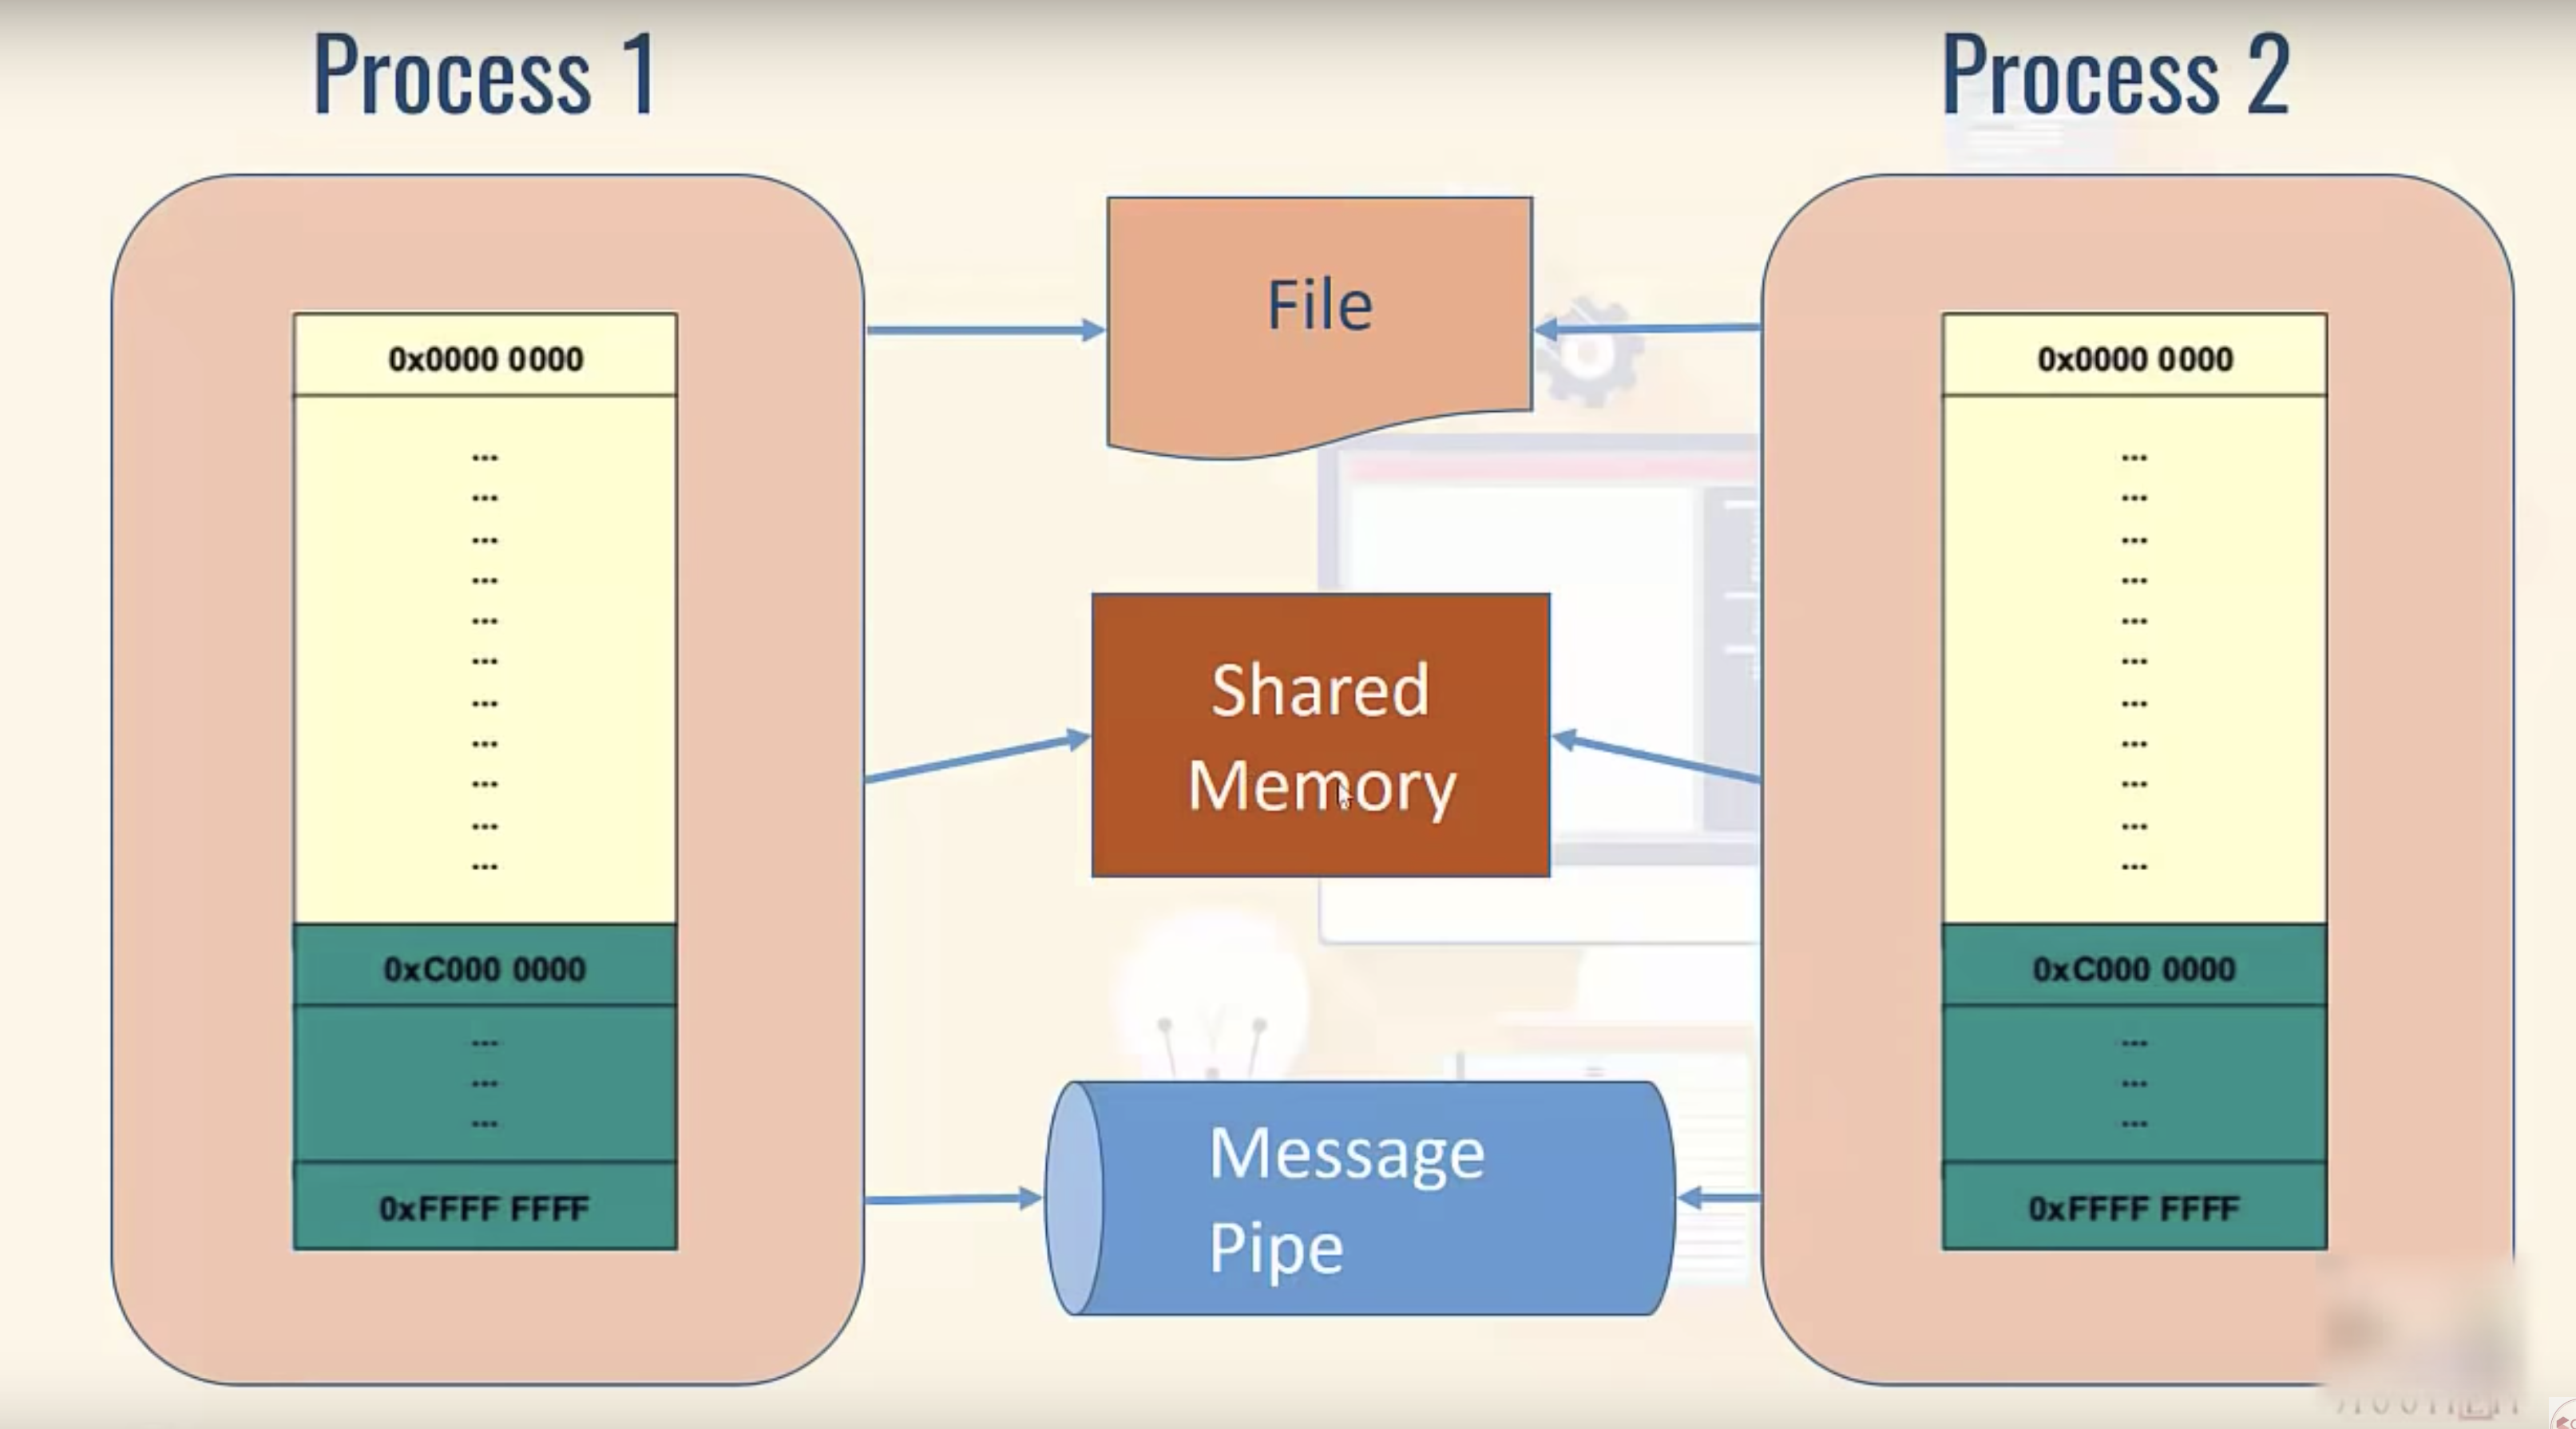

In [14]:
Image (filename='3.png') 

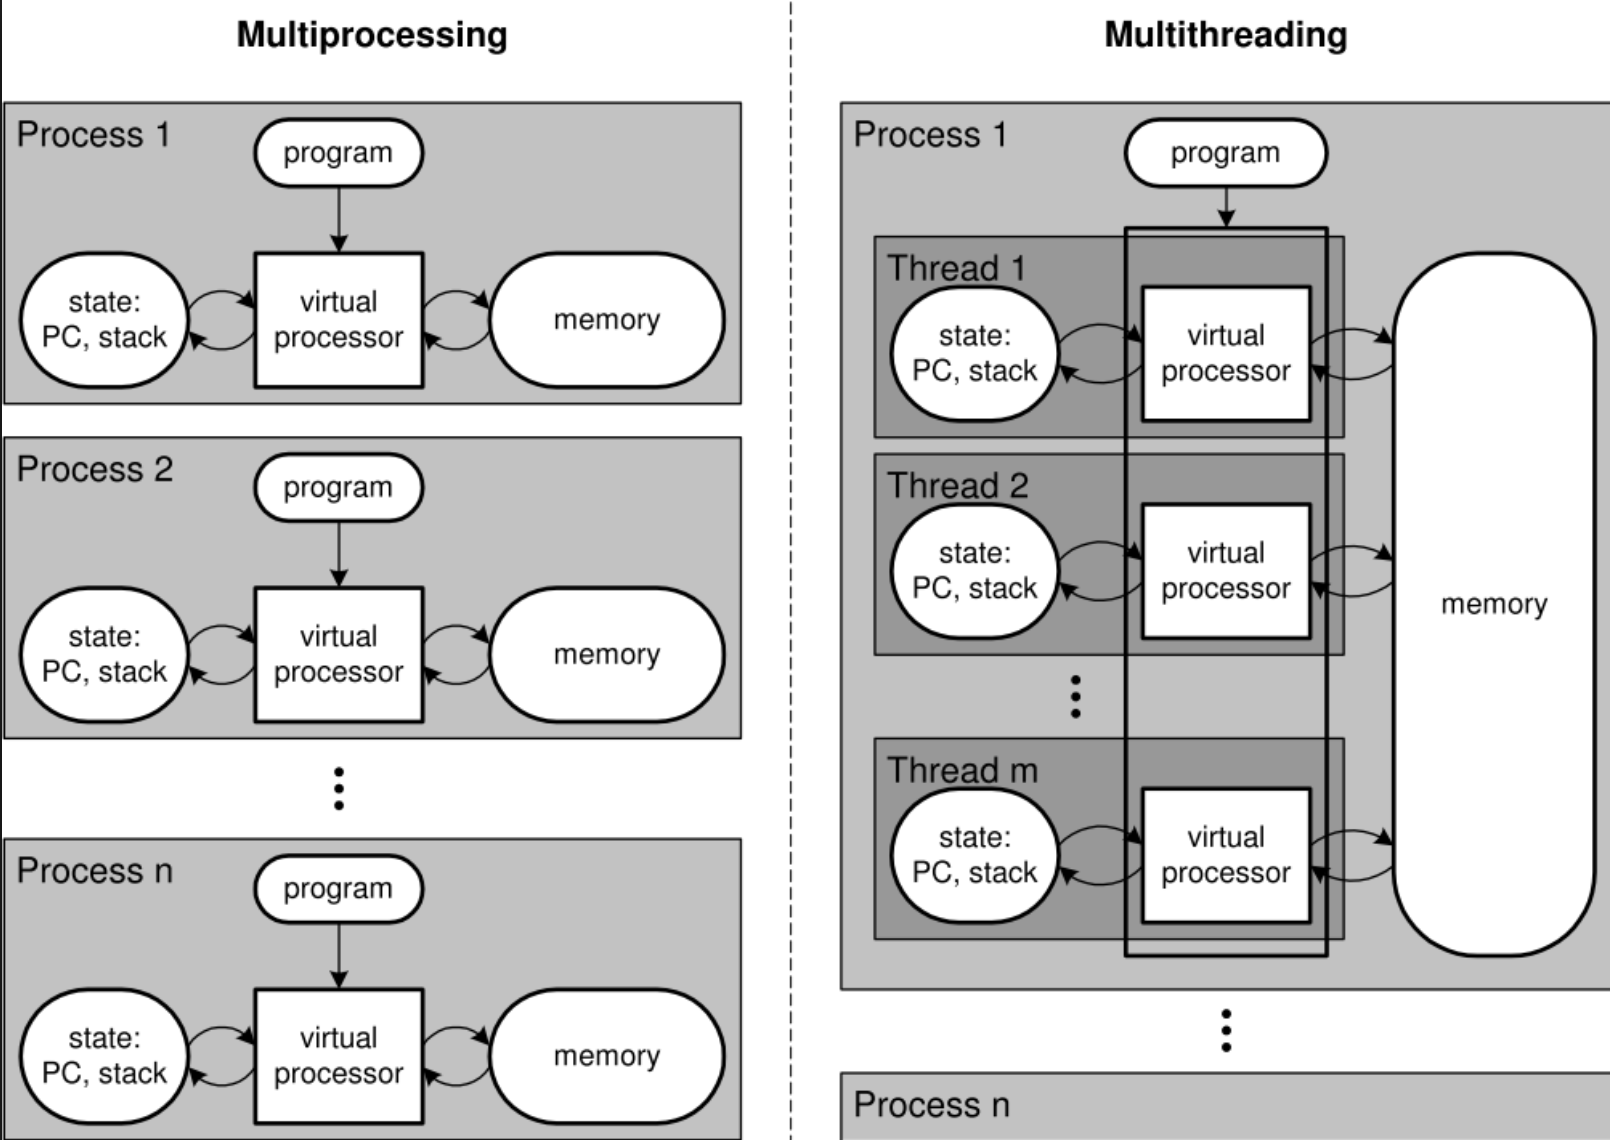

In [16]:
Image(filename='4.png') 

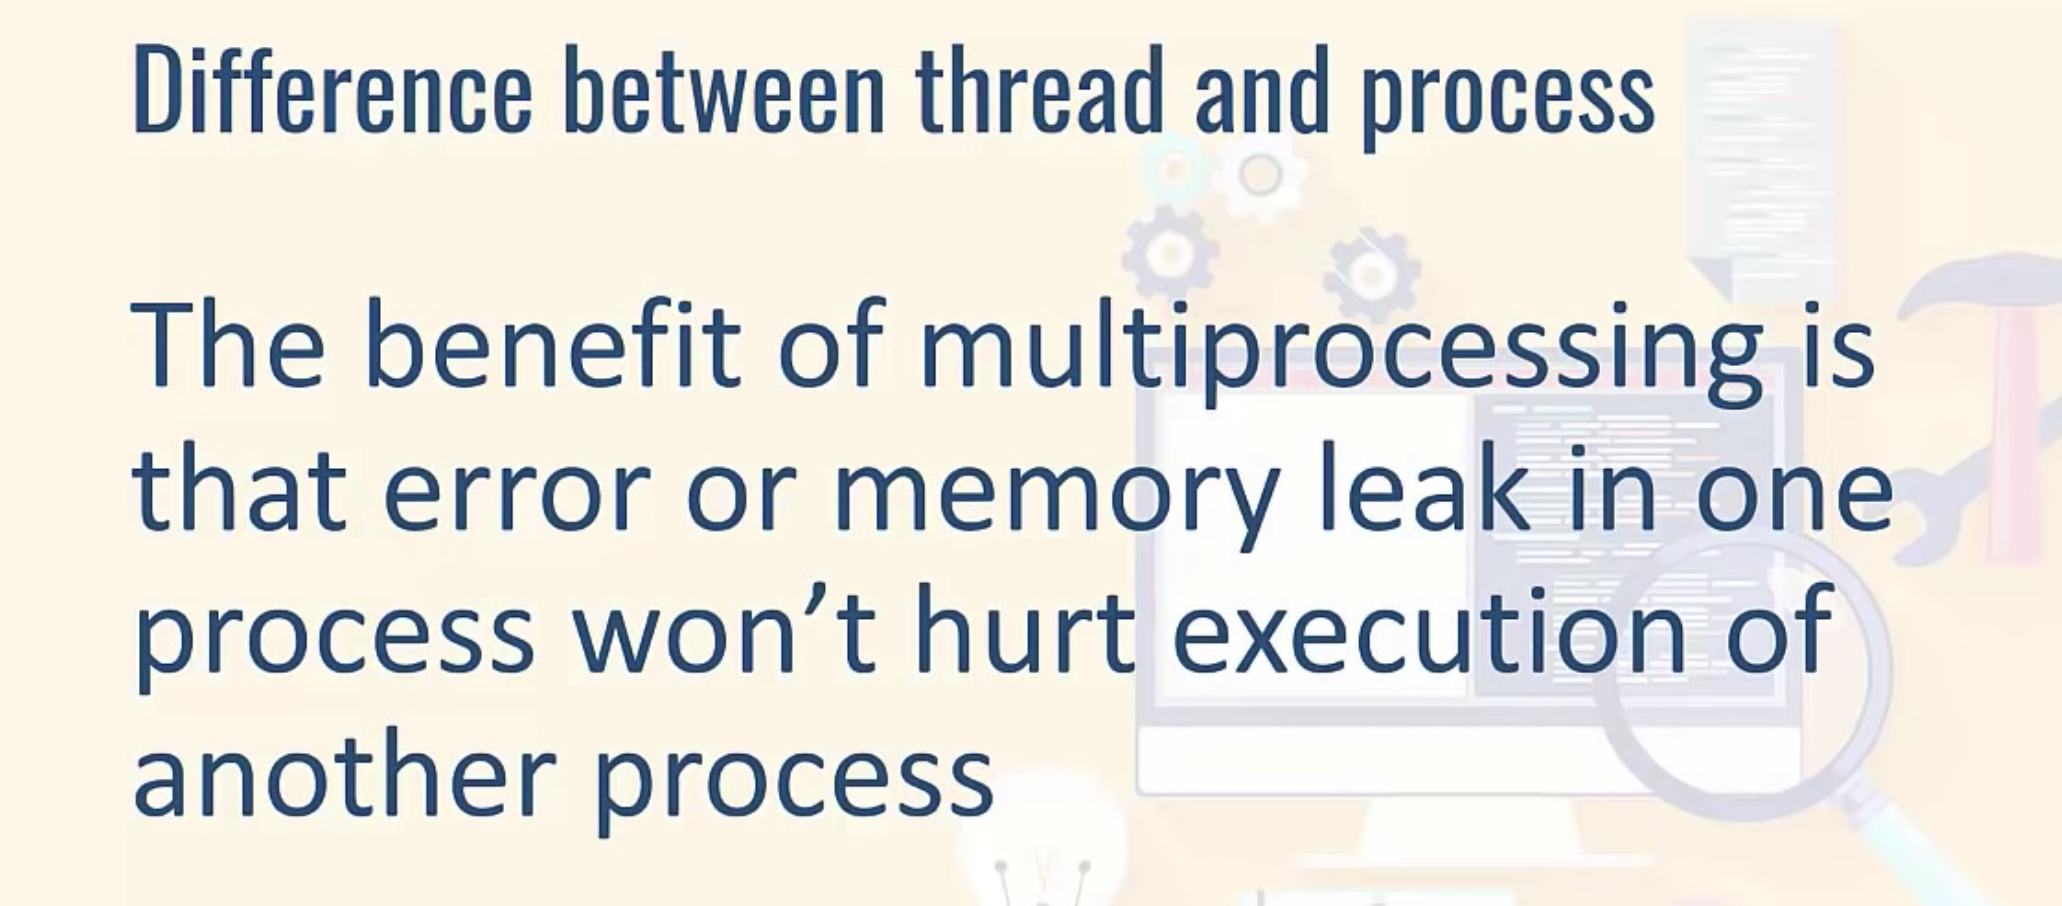

In [17]:
Image(filename='5.png') 

Here are some pros/cons 

### Multiprocessing

#### Pros

    - Separate memory space
    - Code is usually straightforward
    - Takes advantage of multiple CPUs & cores
    - Avoids GIL limitations for cPython
    - Eliminates most needs for synchronization primitives unless if you use shared memory (instead, it's more of a communication model for IPC)
    - Child processes are interruptible/killable
    - Python multiprocessing module includes useful abstractions with an interface much like threading.Thread
    - A must with cPython for CPU-bound processing
    
#### Cons

    - IPC a little more complicated with more overhead (communication model vs. shared memory/objects)
    - Larger memory footprint


### Threading

#### Pros

    - Lightweight - low memory footprint
    - Shared memory - makes access to state from another context easier
    - Allows you to easily make responsive UIs
    - cPython C extension modules that properly release the GIL will run in parallel
    - Great option for I/O-bound applications
    
#### Cons

    - cPython - subject to the GIL
    - Not interruptible/killable
    - If not following a command queue/message pump model (using the Queue module), then manual use of synchronization primitives become a necessity (decisions are needed for the granularity of locking)
    - Code is usually harder to understand and to get right - the potential for race conditions increases dramatically

By default, Python programs execute as a single process using a single CPU. If you have a computer made in the last decade, there’s a good chance it has 4 (or more) CPU cores. That means that 75% or more of your computer’s power is sitting there nearly idle while you are waiting for your program to finish running!

<font color=blue> ***Multiprocessing in Python is the only real way to achieve true parallelism. Multithreading cannot achieve this because the GIL prevents threads from running in parallel.*** </font>

As a consequence, <font color=blue> threading may not always be useful in Python, and in fact, may even result in worse performance depending on what you are trying to achieve.</font> For example, if you are performing a CPU-bound task such as decompressing gzip files or 3D-rendering (anything CPU intensive) then threading may actually hinder your performance rather than help. In such a case, you would want to use Multiprocessing as only this method actually runs in parallel and will help distribute the weight of the task at hand. There could be some overhead to this since Multiprocessing involves copying the memory of a script into each subprocess which may cause issues for larger-sized applications.

However, <font color=blue> Multithreading becomes useful when your task is IO-bound.</font> For example, if most of your task involves waiting on API-calls, you would use Multithreading because why not start up another request in another thread while you wait, rather than have your CPU sit idly by.

TL;DR

<font color=blue> **Multithreading is concurrent and is used for IO-bound tasks.** 

**Multiprocessing achieves true parallelism and is used for CPU-bound tasks.** </font>

The Python threading module uses threads instead of processes. Threads run in the same unique memory heap. Whereas Processes run in separate memory heaps. This, makes sharing information harder with processes and object instances. One problem arises because threads use the same memory heap, multiple threads can write to the same location in the memory heap which is why the global interpreter lock(GIL) in CPython was created as a mutex to prevent it from happening.

What’s Multithreading?

The multithreading library is lightweight, shares memory, responsible for responsive UI and is used well for I/O bound applications. However, the module isn’t killable and is subject to the GIL

Threading library in Python

Multiple threads live in the same process in the same space, each thread will do a specific task, have its own code, own stack memory, instruction pointer, and share heap memory. If a thread has a memory leak it can damage the other threads and parent process.

<font color=blue> Actually threads don’t neither run in parallel nor in sequence. They run concurrently! Each time one job will be executed a little and then the other takes on.</font>

it's perfect for I/O operations such as web scraping because the processor is sitting idle waiting for data.

Concurrency and parallelism are related terms but not the same, and often misconceived as the similar terms. The crucial difference between concurrency and parallelism is that concurrency is about dealing with a lot of things at same time (gives the illusion of simultaneity) or handling concurrent events essentially hiding latency. On the contrary, parallelism is about doing a lot of things at the same time for increasing the speed.

Without multiprocessing, Python programs have trouble maxing out your system's specs because of the GIL (Global Interpreter Lock). Python wasn't designed considering that personal computers might have more than one core (shows you how old the language is), so the GIL is necessary because Python is not thread-safe and there is a globally enforced lock when accessing a Python object. Though not perfect, it's a pretty effective mechanism for memory management. What can we do?

Multiprocessing allows you to create programs that can run concurrently (bypassing the GIL) and use the entirety of your CPU core. Though it is fundamentally different from the threading library, the syntax is quite similar. The multiprocessing library gives each process its own Python interpreter and each their own GIL.

Because of this, the usual problems associated with threading (such as data corruption and deadlocks) are no longer an issue. Since the processes don't share memory, they can't modify the same memory concurrently.

**What Should You Use?**

If your code has a lot of I/O or Network usage:

- Multithreading is your best bet because of its low overhead

If you have a GUI

- Multithreading so your UI thread doesn't get locked up

If your code is CPU bound:

- You should use multiprocessing (if your machine has multiple cores)

### Python Multithreading Library 



In [2]:
import time

def calc_square(numbers):
    print("calculate square numbers")
    for n in numbers:
        time.sleep(0.2) # simulating I/O operations 
        print('square:',n*n)

def calc_cube(numbers):
    print("calculate cube of numbers")
    for n in numbers:
        time.sleep(0.2)
        print('cube:',n*n*n)

arr = range(5)

t = time.time()

calc_square (arr)

calc_cube (arr)

print("done in {} sec".format(time.time()-t))
print("done with all work now!")

calculate square numbers
square: 0
square: 1
square: 4
square: 9
square: 16
calculate cube of numbers
cube: 0
cube: 1
cube: 8
cube: 27
cube: 64
done in 2.025563955307007 sec
done with all work now!


<font color=blue> Now lets do the same with threading </font>

In [3]:
import time
import threading

def calc_square(numbers):
    print("calculate square numbers")
    for n in numbers:
        time.sleep(0.2) 
        print('square:',n*n)

def calc_cube(numbers):
    print("calculate cube of numbers")
    for n in numbers:
        time.sleep(0.2)
        print('cube:',n*n*n)

arr = range(5)

t = time.time()

t1= threading.Thread(target=calc_square, args=(arr,))
t2= threading.Thread(target=calc_cube, args=(arr,))

t1.start()
t2.start()

# join makes it wait till the thread is done (execution joins back to main program)
t1.join()
t2.join()

print("done in {} sec".format(time.time()-t))
print("done with all work now!")

calculate square numbers
calculate cube of numbers
square: 0
cube: 0
square: 1
cube: 1
square:cube: 4
 8
square:cube: 9
 27
square: 16
cube: 64
done in 1.0203490257263184 sec
done with all work now!


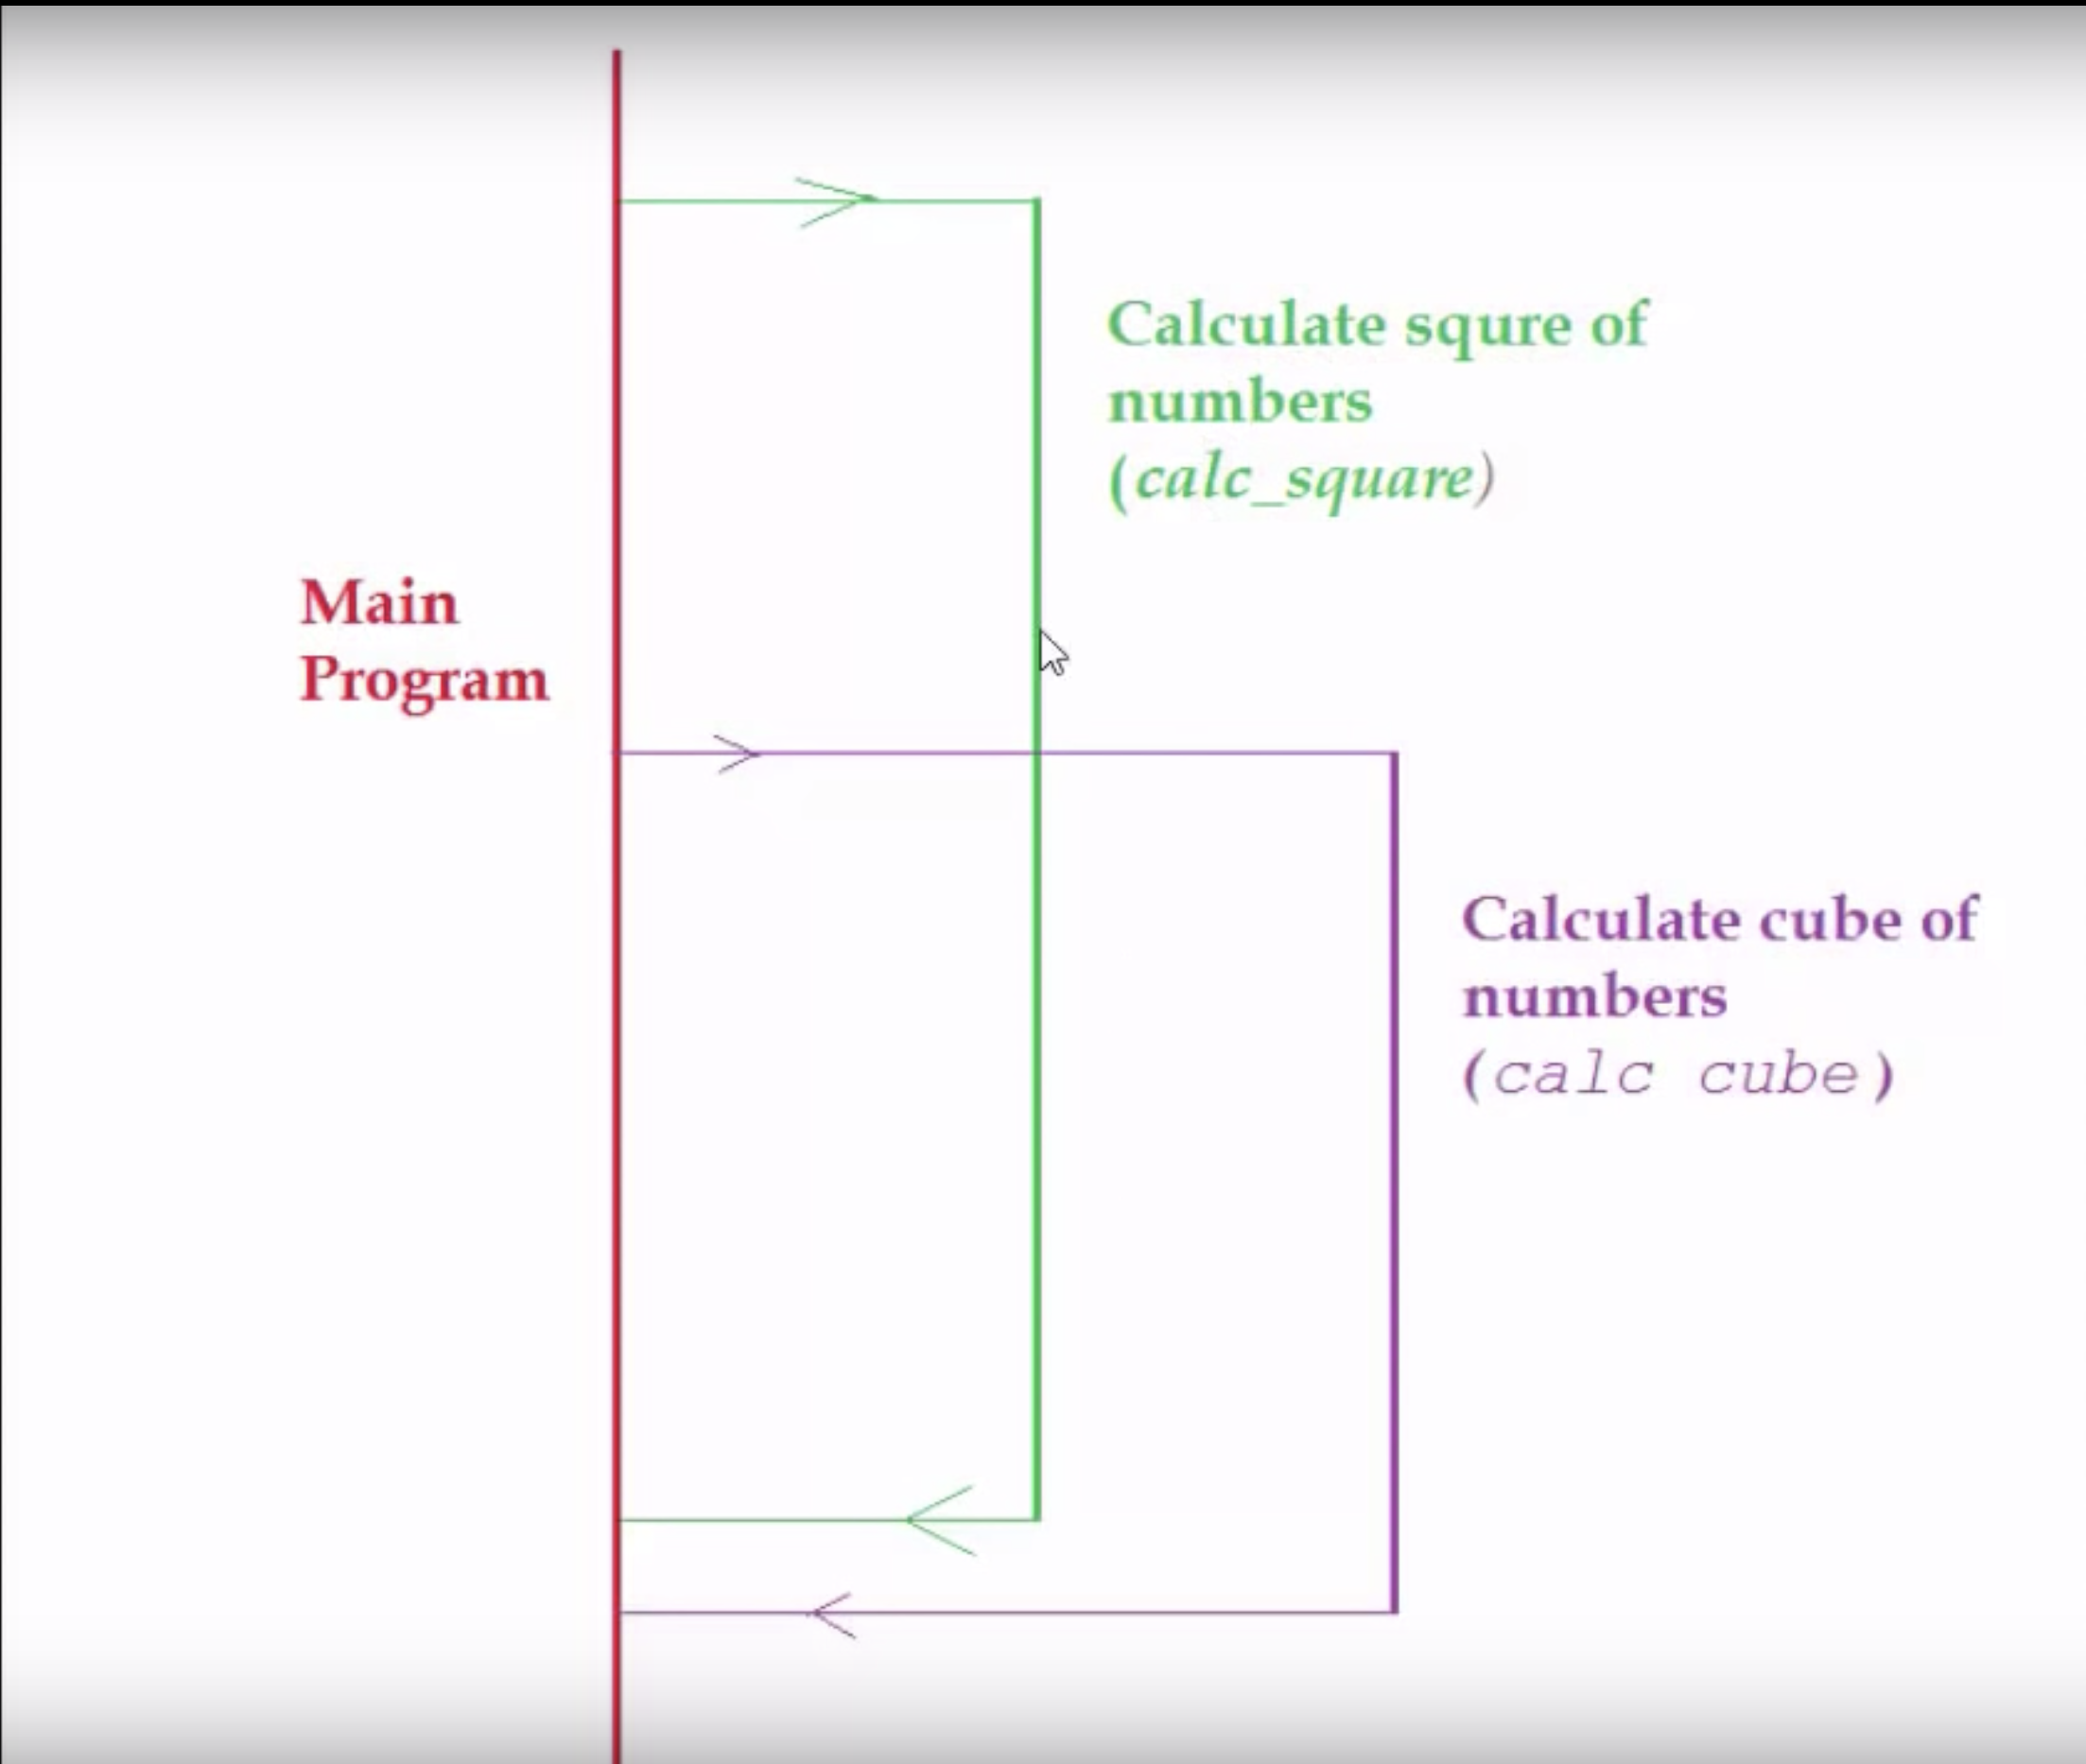

In [18]:
Image(filename='6.png') 

**The Lock**

You'll often want your threads to be able to use or modify variables common between threads but to do that you'll have to use something known as a lock. Whenever a function wants to modify a variable, it locks that variable. When another function wants to use a variable, it must wait until that variable is unlocked.

Imagine two functions which both iterate a variable by 1. The lock allows you to ensure that one function can access the variable, perform calculations, and write back to that variable before another function can access the same variable.


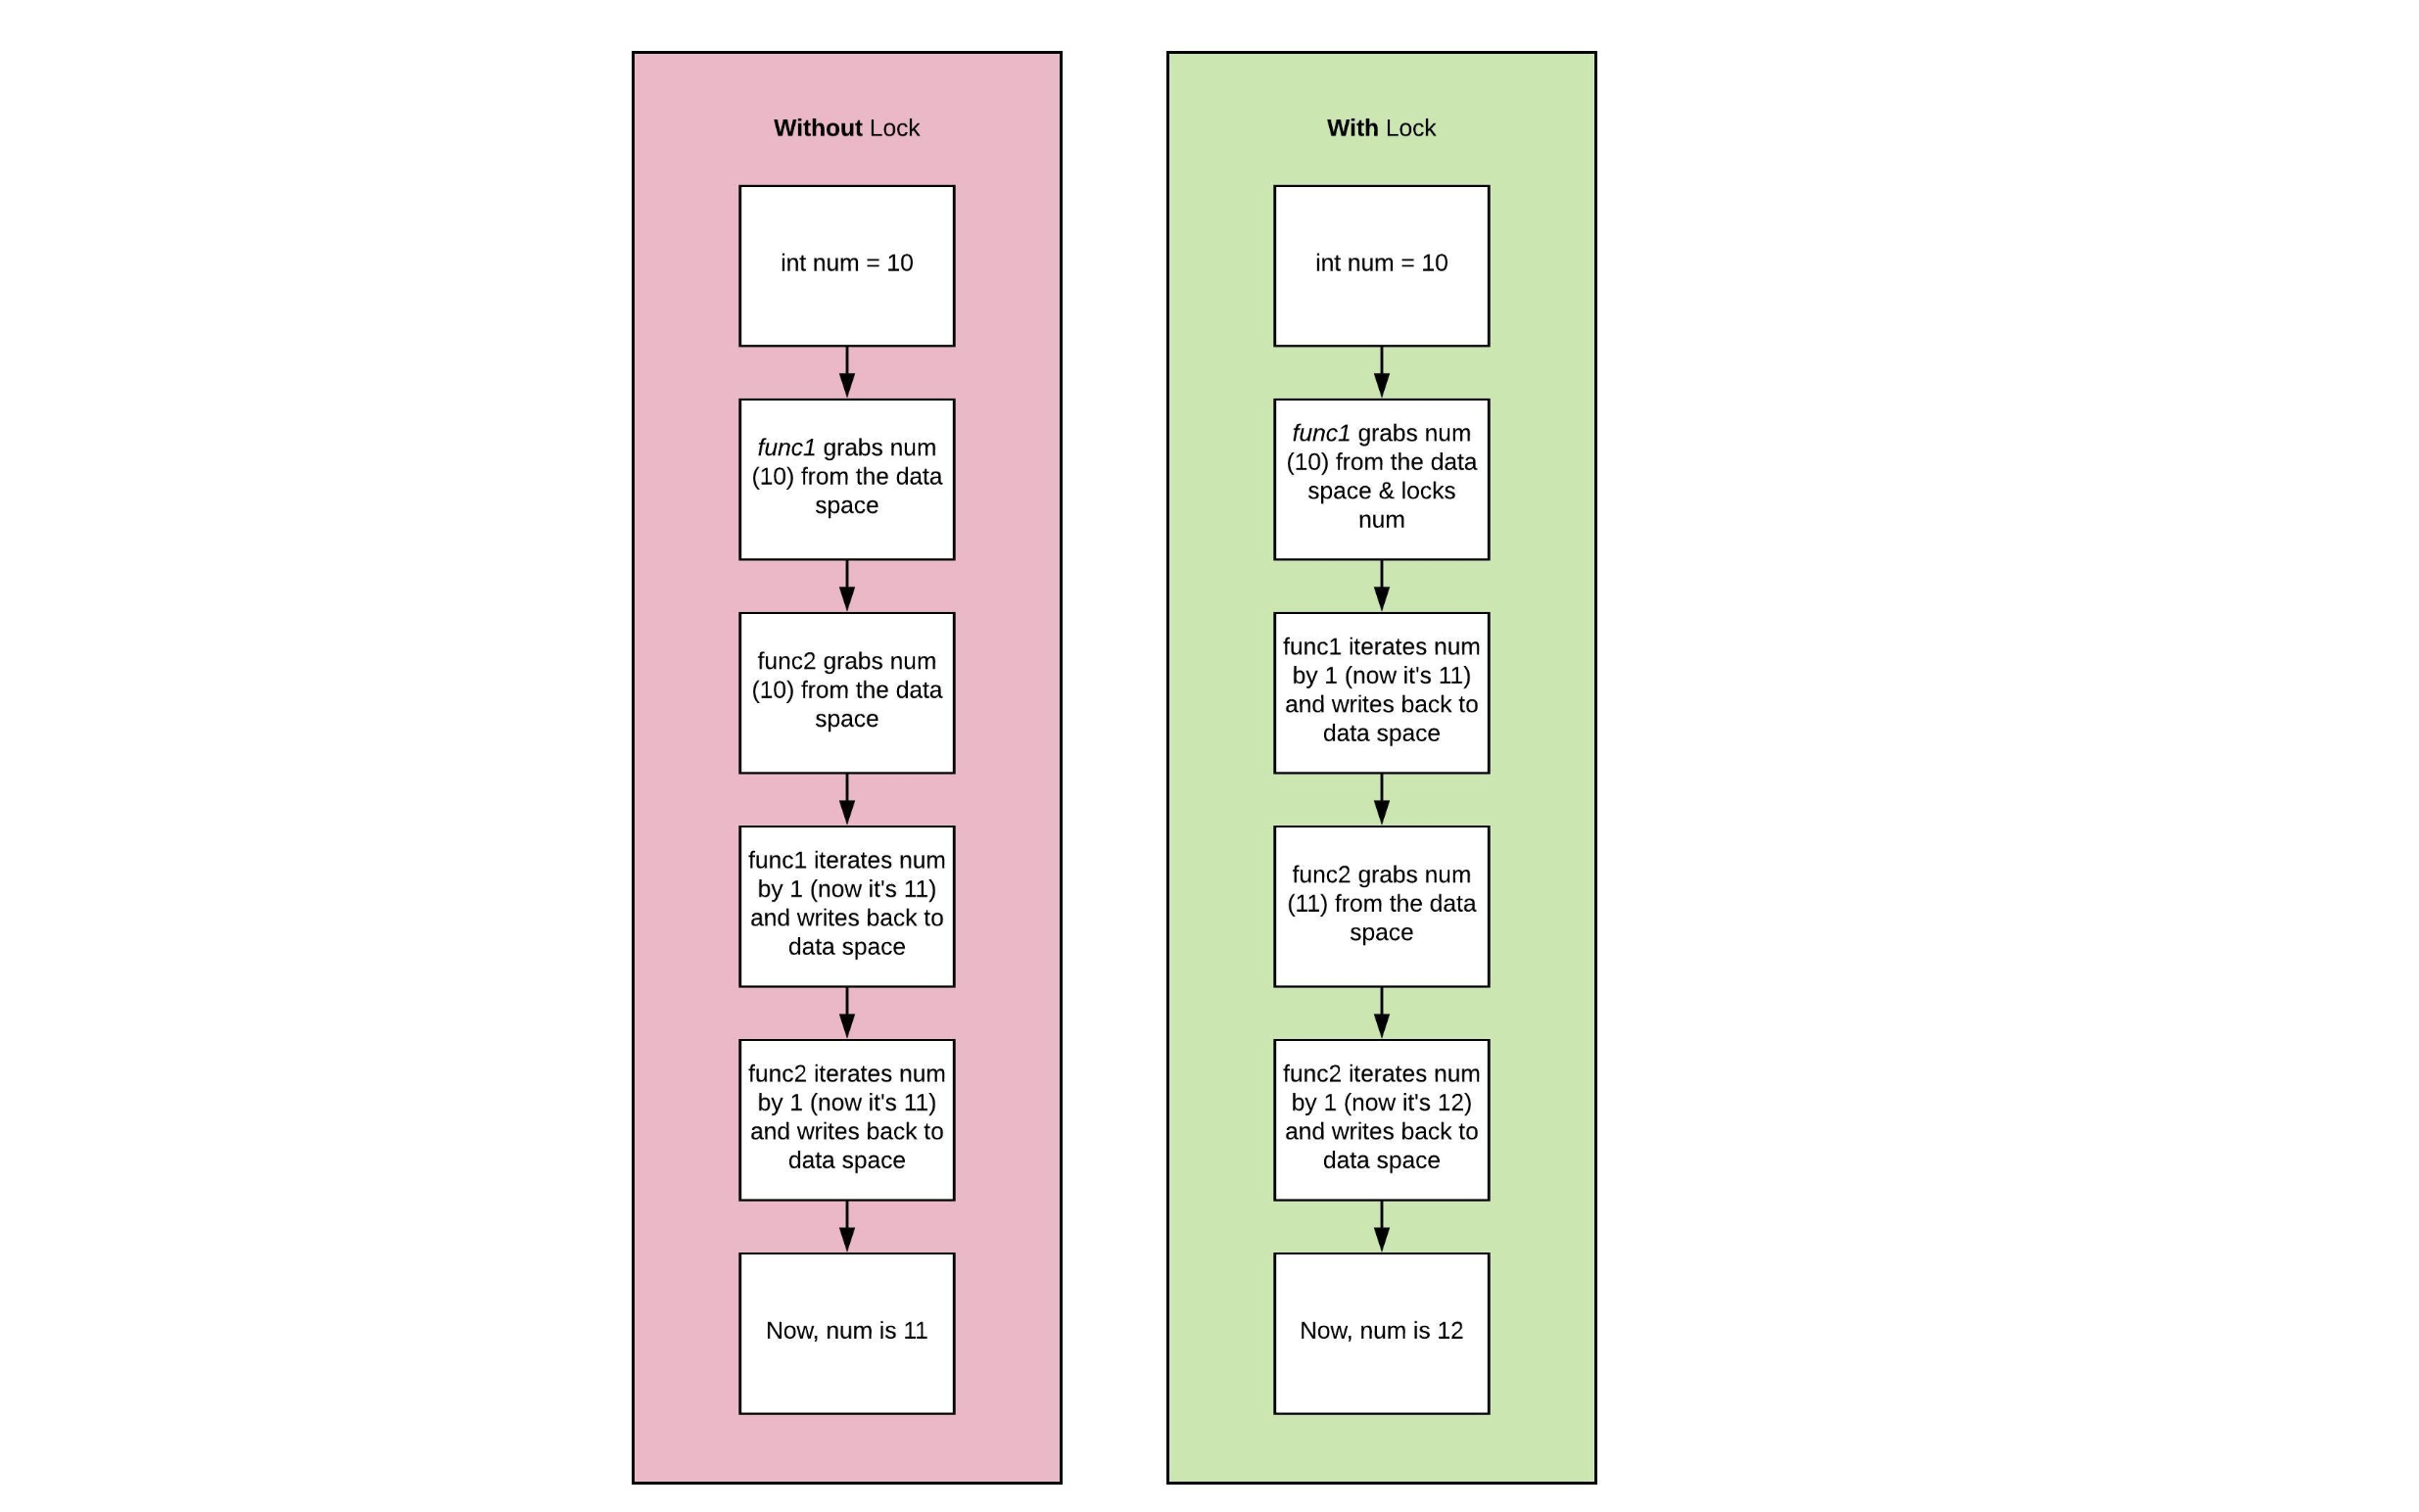

In [19]:
Image(filename='7.png') 

### Python Multiprocessing Library 

In parallel processing, there are two types of execution: **Synchronous and Asynchronous**.

<font color=blue> A synchronous execution is one the processes are completed in the same order in which it was started. This is achieved by locking the main program until the respective processes are finished.

Asynchronous, on the other hand, doesn’t involve locking. As a result, the order of results can get mixed up but usually gets done quicker.</font>

There are 2 main objects in multiprocessing to implement parallel execution of a function: The **Pool** Class and the **Process** Class. Both Pool and Process methods of multiprocessing library of Python initiates a new process for our task, but in a different way. Process makes only one process per call.


- Pool Class

    Synchronous execution
        Pool.map() and Pool.starmap()
        Pool.apply()
    Asynchronous execution
        Pool.map_async() and Pool.starmap_async()
        Pool.apply_async())
        
- Process class


Though Pool and Process both executes the task parallelly, but their way executing task parallelly is different.

<font color=blue> The **pool** distributes the tasks to the available processors using a FIFO scheduling.</font> It works like a map reduce architecture. It maps the input to the different processors and collects the output from all the processors. After the execution of code, it returns the output in form of a list or array. **It waits for all the tasks to finish and then returns the output**. The processes in execution are stored in memory and other non-executing processes are stored out of memory.

<font color=blue> The **process** class puts all the processes in memory and schedules execution using FIFO policy.</font>  When the process is suspended, it pre-empts and schedules new process for execution.




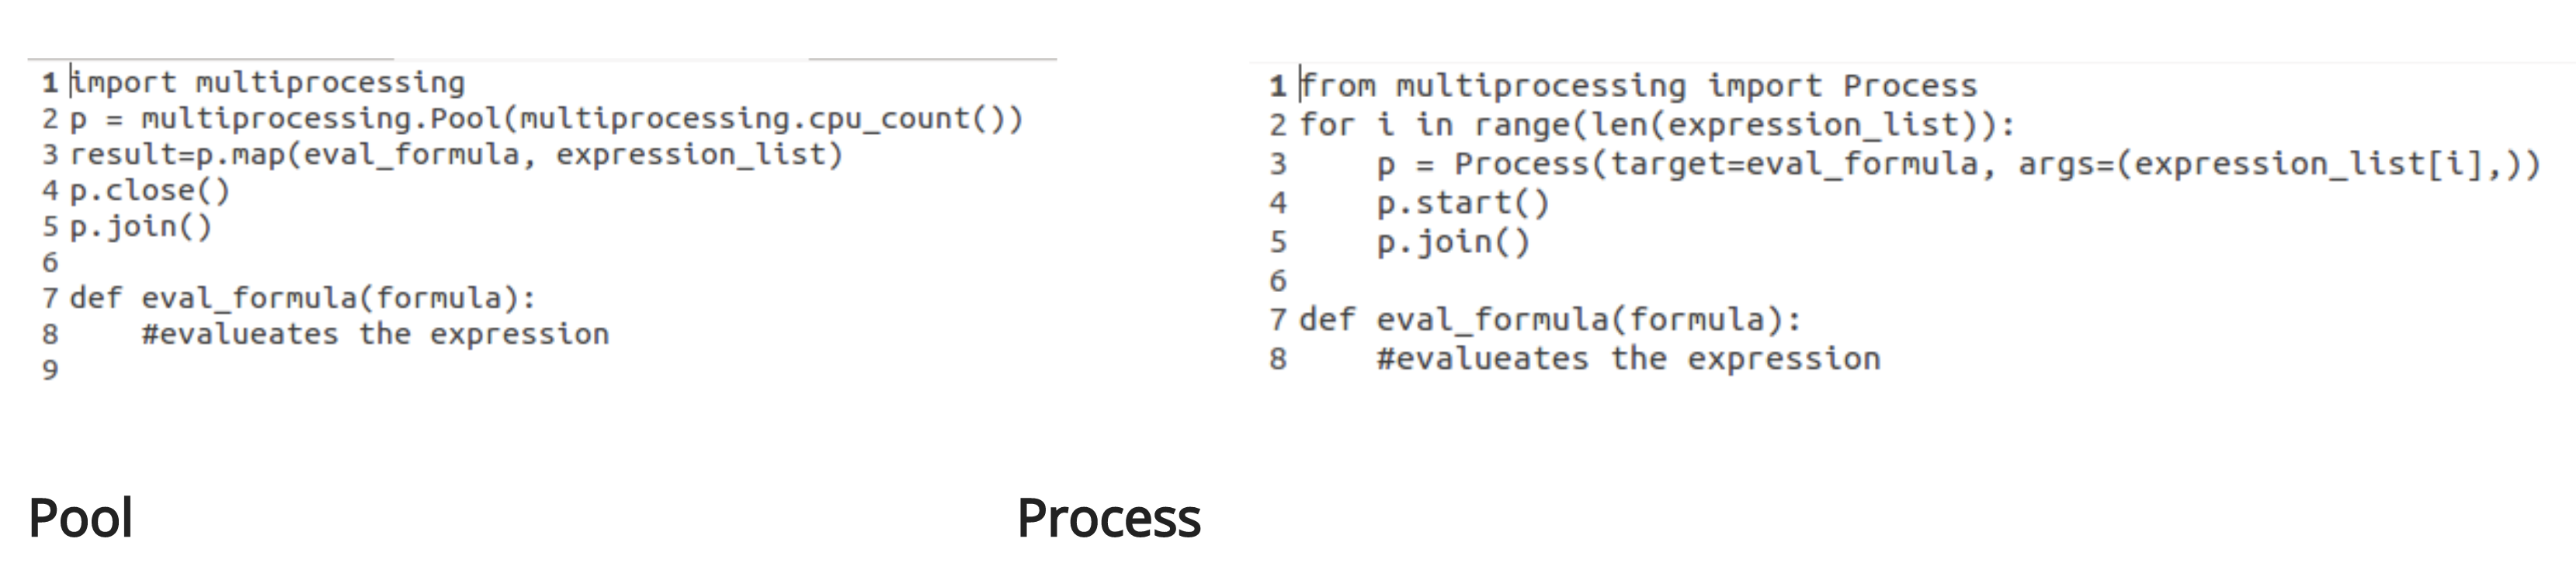

In [20]:
Image(filename='8.png') 

Choosing an appropriate approach depends on the task in hand. Pool allows you to do multiple jobs per process, which may make it easier to parallelize your program. <font color=blue> If  you have a million tasks to execute in parallel, you can create a Pool with number of processes as many as CPU cores and then pass the list of the million tasks to pool.map.</font> The pool will distribute those tasks to the worker processes(typically same in number as available cores) and collects the return values in the form of list and pass it to the parent process.

On the other hand, <font color=blue>if you have a small number of tasks to execute in parallel, and you only need each task done once, it may be perfectly reasonable to use a separate multiprocessing.process for each task, rather than setting up a Pool.</font>

Task number

As we have seen, <font color=blue>the Pool allocates only executing processes in memory and process allocates all the tasks in memory, so when the task number is small, we can use process class and when the task number is large, we can use pool.</font> In case of large tasks, if we use process then memory problem might occur, causing system disturbance. In case of Pool, there is overhead in creating it. Hence <font color=blue>with small task numbers, the performance is impacted when Pool is used.</font>

IO operations

The Pool distributes the processes among the available cores in FIFO manner. On each core, the allocated process executes serially. So, if there is a long IO operation, it waits till the IO operation is completed and does not schedule another process. This leads to the increase in execution time.  The Process class suspends the process executing IO operations and schedules another process. So, <font color=blue> in case of long IO operation, it is advisable to use process class.</font>


#### Process class

Python multiprocessing Process class is an abstraction that sets up another Python process, provides it to run code and a way for the parent application to control execution.

There are two important functions that belongs to the Process class – **start() and join()** function.

At first, we need to write a function, that will be run by the process. Then, we need to instantiate a process object.

If we create a process object, nothing will happen until we tell it to start processing via start() function. Then, the process will run and return its result. After that we tell the process to complete via join() function.

Without **join()** function call, process will remain idle and won’t terminate.

So if you create many processes and don’t terminate them, you may face scarcity of resources. Then you may need to kill them manually.

One important thing is, if you want to pass any argument through the process you need to use **args** keyword argument. The following code will be helpful to understand the usage of Process class.

In [4]:
import multiprocessing
from multiprocessing import Process


def testing():
    print("Works")


def square(n):
    print("The number squares to ", n**2)


def cube(n):
    print("The number cubes to ", n**3)


def call():
    
    p1 = Process(target=cube, args=(1234,))
    p2 = Process(target=square, args=(1234,))
    p3 = Process(target=testing)
    p1.start()
    p2.start()
    p3.start()
    print("We're done")
    
call()

We're done
The number cubes to  1879080904
The number squares to  1522756
Works


In [5]:
def call():
    
    p1 = Process(target=cube, args=(1234,))
    p2 = Process(target=square, args=(1234,))
    p3 = Process(target=testing)
    p1.start()
    p2.start()
    p3.start()
    p1.join()
    p2.join()
    p3.join()
    print("We're done")
    
call()

The number cubes to  1879080904
The number squares to  1522756
Works
We're done


**Process()** lets us instantiate the Process class. **start()** tells Python to begin processing. But then if we let it be, it consumes resources and we may run out of those at a later point in time. This is because it lets the process stay idle and not terminate. To avoid this, we make a call to **join()**. With this, we don’t have to kill them manually. Join stops execution of the current program until a process completes. This makes sure the program waits for p1 to complete and then p2 to complete. Then, it executes the next statements of the program. One last thing, the args keyword argument lets us specify the values of the argument to pass. Also, target lets us select the function for the process to execute.

In [6]:
import multiprocessing as mp
import random

output = mp.Queue()

def calc_square(number, output):

    output.put(number ** 2)

processes = [mp.Process(target= calc_square, args = (random.randint(0,100), output)) for x in range(100)]

# This call will make only one process, which will process target-function with given arguments in background.

In [7]:
# But the process still hasn’t started. To start it you have to do:

for p in processes:
    p.start()

# Now you can either leave it here, or check if the process is complete or not by:
for p in processes:
    p.join()

# Now it will wait for process to complete.

# Get process results from the output queue
results = [output.get() for p in processes]

print(results)

[3969, 0, 3249, 2304, 9604, 400, 9025, 144, 324, 1, 7396, 5929, 1849, 5184, 676, 8100, 2304, 1156, 5329, 4761, 2704, 1, 2116, 225, 7396, 2025, 1681, 2601, 784, 2500, 3721, 900, 961, 6400, 961, 784, 3481, 4900, 2809, 49, 2809, 5929, 7225, 324, 9216, 529, 6400, 196, 5625, 2209, 3025, 6889, 1024, 2025, 2116, 7921, 3481, 3600, 6889, 361, 2116, 4489, 36, 900, 484, 9409, 1600, 2116, 5041, 7921, 2025, 7569, 625, 2809, 5776, 4761, 3481, 9216, 121, 900, 4225, 3600, 4624, 3481, 1936, 1849, 1024, 1296, 100, 1024, 2500, 36, 8464, 8649, 1156, 8464, 3600, 1089, 2809, 121]


If you want to pass arguments to your process, you can do that with args

In [8]:
import multiprocessing

def spawn(num):
    
    if num%2 == 0:
        print(num**3, end=" ")
    else:
        print(num**2, end=" ")

if __name__ == '__main__':
    
    for i in range(100):
        
        p = multiprocessing.Process(target=spawn, args=(i,))
        p.start()

0 1 8 9 64 25 216 49 512 81 1000 121 1728 169 2744 225 4096 289 5832 361 8000 441 10648 529 13824 625 17576 729 21952 841 27000 961 32768 1089 39304 1225 46656 1369 54872 1521 64000 1681 74088 1849 85184 2025 97336 2209 110592 2401 125000 2601 140608 2809 157464 3025 175616 3249 195112 3481 216000 3721 238328 3969 262144 4225 287496 4489 314432 4761 343000 5041 373248 5329 405224 5625 438976 5929 474552 6241 512000 6561 551368 6889 592704 7225 636056 7569 681472 7921 729000 8281 778688 8649 830584 9025 884736 9409 941192 9801 

Using Process Pools is a great solution when you have a list of data to process and each piece of data can be processed independently. Here are some examples of when multiprocessing is a good fit:

- Grabbing statistics out of a collection of separate web server log files
- Parsing data out of a bunch of XML, CSV or json files
- Pre-processing lots of images to create a machine learning data set

But Process Pools aren’t always the answer. Using a Process Pool requires passing data back and forth between separate Python processes. If the data you are working with can’t be efficiently passed between processes, this won’t work. The data you are processing needs to be a type that Python knows how to pickle.

Also, the data won’t be processed in a predictable order. If you need the result from processing the previous piece of data to process the next piece of data, this won’t work.

#### Pool class

A simpler way to maintain an ordered list of results is to use the **Pool.apply** and **Pool.map** functions

Another and more convenient approach for simple parallel processing tasks is provided by the Pool class.

There are four methods that are particularly interesting:

- Pool.apply

- Pool.map

- Pool.apply_async

- Pool.map_async

The Pool.apply and Pool.map methods are basically equivalents to Python’s in-built apply and map functions.

Both apply and map take the function to be parallelized as the main argument. But the difference is, **apply()** takes an args argument that accepts the parameters passed to the ‘function-to-be-parallelized’ as an argument, whereas, **map** can take only one iterable as an argument.

So, map() is really more suitable for simpler iterable operations but does the job faster.

<font color=blue> In a nutshell, map and map_async are called for a list of jobs in one time, but apply and apply_async  can only called for one job. However, apply_async execute a job in background therefore in parallel. </font>

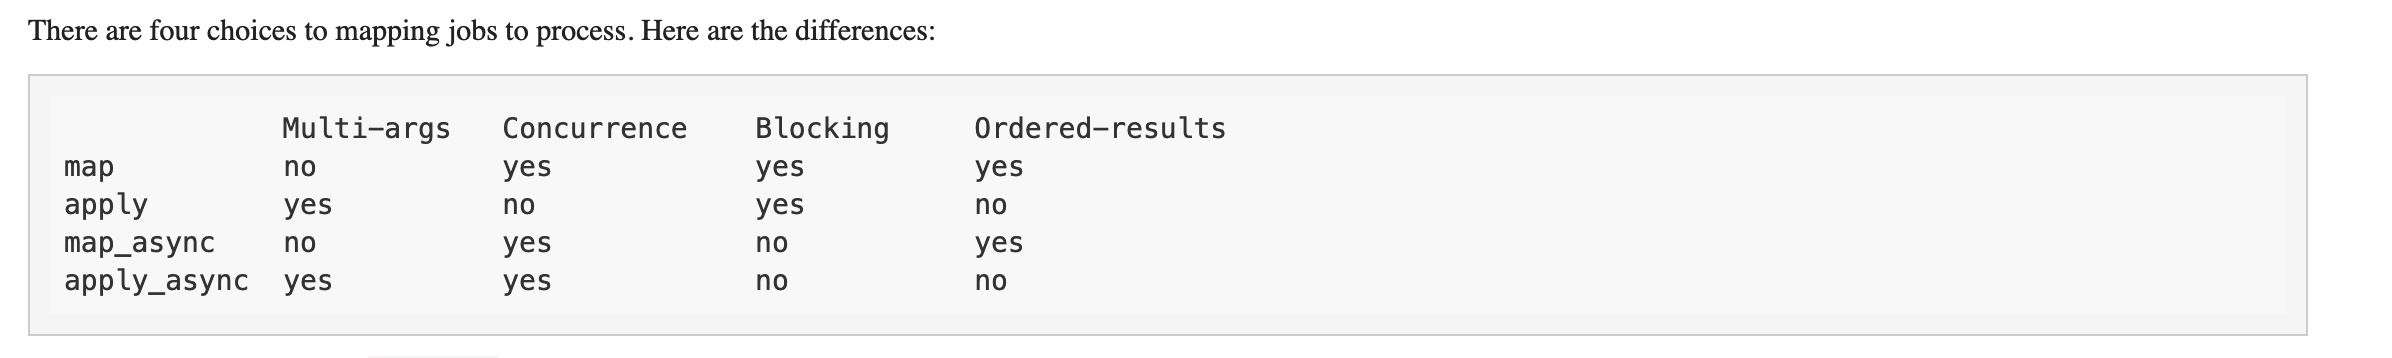


In Python 3, a new function starmap can accept multiple arguments.

Let us take a look at a simple example using **Pool.apply** and **Pool.map**. We will set the number of processes to 4, which means that the Pool class will only allow 4 processes running at the same time.

In [8]:
import multiprocessing as mp

def cube(x):
    return x**3

pool = mp.Pool(processes=4)

results = [pool.apply(cube, args=(x,)) for x in range(1,7)]

pool.close()

print(results)


[1, 8, 27, 64, 125, 216]


In [29]:
pool = mp.Pool(processes=4)
results = pool.map(cube, range(1,7))

pool.close()

print(results)

[1, 8, 27, 64, 125, 216]


The **Pool.map** and **Pool.apply** will lock the main program until all processes are finished, which is quite useful if we want to obtain results in a particular order for certain applications. 

In contrast, the **async** variants will submit all processes at once and retrieve the results as soon as they are finished. One more difference is that we need to use the **get** method after the **apply_async()** call in order to obtain the return values of the finished processes.

In [25]:
pool = mp.Pool(processes=4)
results = [pool.apply_async(cube, args=(x,)) for x in range(1,7)]
output = [p.get() for p in results]

pool.close()

print(output)

[1, 8, 27, 64, 125, 216]


In [11]:
mp.cpu_count()

8

In [5]:
import multiprocessing as mp

def square(x):  
    # calculate the square of the value of x
    return x*x


# Define the dataset
dataset = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Output the dataset
print ('Dataset: ', dataset)

# Run this with a pool of as many agents as cpu_count

agents = mp.cpu_count()

with mp.Pool(processes=agents) as mypool:
    
    result = mypool.map(square, dataset)

# Output the result
print ('Result:  ', result)


Dataset:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Result:   [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196]


### concurrent.futures module

Let’s learn how to take advantage of the full processing power of your computer by running Python functions in parallel. Thanks to Python’s concurrent.futures module, it only takes 3 lines of code to turn a normal program into one that can process data in parallel.


In [9]:
def cube(x, counter):
    return x**1234

list_of_cubes = []

for i in range (8):
    
    list_of_cubes.append(cube(i))


So while I’m maxing out the capacity of one CPU, the other three CPUs aren’t doing anything. I need a way to split the work load into 4 separate chunks that I can run in parallel.

**import concurrent.futures**

    with concurrent.futures.ProcessPoolExecutor() as executor:
    
By default, it will create one Python process for each CPU in your machine. So if you have 4 CPUs, this will start up 4 Python processes.

The final step is to ask the Process Pool to execute our helper function on our list of data using those 4 processes. We can do that by replacing the original for loop we had:
    
    for cubes in executor.map(cube, range (1234567)):
    
The executor.map() function returns results in the same order as the list of data we gave it to process.

In [11]:
%%timeit

import concurrent.futures

list_of_cubes = []

with concurrent.futures.ProcessPoolExecutor(8) as executor:

    for cubes in executor.map(cube, range (8)):
        list_of_cubes.append(cubes)


CPU times: user 19.2 ms, sys: 32 ms, total: 51.2 ms
Wall time: 53.3 ms


### joblib Parallel module

In [1]:
from joblib import Parallel, delayed, cpu_count

def cube(x):
    return x**3

results = Parallel(n_jobs=cpu_count())(delayed(cube)(i) for i in range(8))

results

[0, 1, 8, 27, 64, 125, 216, 343]

**Sources:**
    
https://medium.com/@bfortuner/python-multithreading-vs-multiprocessing-73072ce5600b
    
https://medium.com/contentsquare-engineering-blog/multithreading-vs-multiprocessing-in-python-ece023ad55a
    
https://www.ellicium.com/python-multiprocessing-pool-process/
    
https://sebastianraschka.com/Articles/2014_multiprocessing.html
    
https://medium.com/@ageitgey/quick-tip-speed-up-your-python-data-processing-scripts-with-process-pools-cf275350163a

https://data-flair.training/blogs/python-multiprocessing/
